# TomoPy with the ASTRA toolbox

Here is an example on how to use the [ASTRA toolbox](http://www.astra-toolbox.com/docs/install.html) through its integration with [TomoPy](http://tomopy.readthedocs.io/en/latest) as published in  <cite data-cite="Pelt:16a">Pelt:16a</cite>.

To reconstruct the image with the ASTRA toolbox instead of TomoPy, change the ``algorithm`` keyword to ``tomopy.astra``. Specify which projection kernel to use (``proj_type``) and which ASTRA algorithm to reconstruct with (``method``) in the ``options`` keyword.

These two cells are an abbreviated setup for [Reconstruction with TomoPy](tomopy.rst).

In [1]:
import dxchange
import matplotlib.pyplot as plt
import tomopy

In [2]:
proj, flat, dark, theta = dxchange.read_aps_32id(
    fname='../../source/tomopy/data/tooth.h5',
    sino=(0, 2),
)
proj = tomopy.normalize(proj, flat, dark)
rot_center = 296
proj = tomopy.minus_log(proj)

For example, to use a line-based CPU kernel and the FBP method, use:

Reconstructing 48 slice groups with 2 master threads...


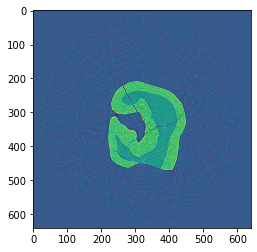

In [3]:
options = {'proj_type': 'linear', 'method': 'FBP'}
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

If you have a CUDA-capable NVIDIA GPU, reconstruction times can be greatly
reduced by using GPU-based algorithms of the ASTRA toolbox, especially for
iterative reconstruction methods.

To use the GPU, change the ``proj_type`` option to ``'cuda'``, and use
CUDA-specific algorithms (e.g. ``'FBP_CUDA'`` for FBP):

Reconstructing 48 slice groups with 2 master threads...


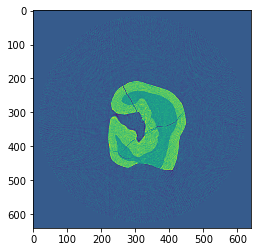

In [4]:
options = {'proj_type': 'cuda', 'method': 'FBP_CUDA'}
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

Many algorithms of the ASTRA toolbox support additional options, which can be found in the [documentation](http://www.astra-toolbox.com/docs/algs/index.html). These options can be specified using the ``extra_options`` keyword.

For example, to use the GPU-based iterative SIRT method with a non-negativity constraint, use:

Reconstructing 48 slice groups with 2 master threads...


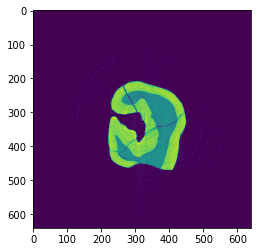

In [6]:
extra_options = {'MinConstraint': 0}
options = {
    'proj_type': 'cuda',
    'method': 'SIRT_CUDA',
    'num_iter': 200,
    'extra_options': extra_options
}
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

More information about the projection kernels and algorithms that are supported
by the ASTRA toolbox can be found in the documentation: [projection kernels](https://www.astra-toolbox.com/docs/proj2d.html) and [algorithms](https://www.astra-toolbox.com/docs/algs/index.html). Note that only the 2D
(i.e. slice-based) algorithms are supported when reconstructing through TomoPy.